### What is BoomBikes ?

- A bike-sharing system in which bikes are made available for shared use to individuals on a short term basis for a price or free. It allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


### Business objective: 

 - The objective is to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 


In [246]:
import warnings 
warnings.filterwarnings('ignore') # importing module 'warnings' to get rid of all warnings 

In [247]:
### importing all necessary modules 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [248]:
# Read the data

bike = pd.read_csv("day.csv")


In [249]:
# Checking if there is any Null values in the Dataframe

bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [250]:
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### Found no Null values in any columns

In [251]:
### checking the shape of the dataframe

bike.shape

(730, 16)

In [252]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [253]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [254]:
# Creating cat_col lists of all categorical columns

cat_col = ['season','yr','mnth','holiday','weekday','workingday','weathersit']

In [255]:
# Creating cont_col lists of all numerical columns

cont_col = ['cnt','temp','atemp','hum','windspeed']

### Sanity Cheeck

In [256]:
bike[(bike['workingday']==1) & (bike['holiday']==1)]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


In [257]:
bike[(bike['workingday']==1) & (bike['weekday']==6)]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


In [258]:
bike[(bike['workingday']==1) & (bike['weekday']==7)]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


### Found no rows where Working day is mismatched with holiday or weekday is a Saturday(6) or Sunday(7)

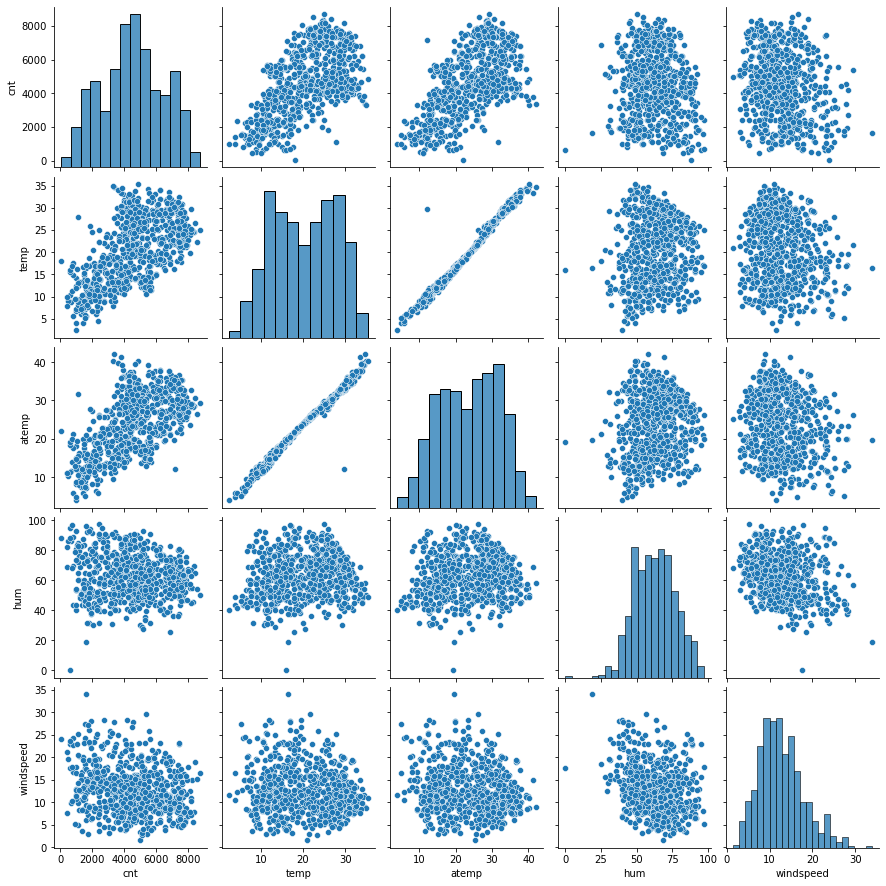

In [259]:
# Visualizing correlation between continuous columns

sns.pairplot(bike[cont_col])
plt.show()

### Seems temp and atemp are highly correlated with 'Cnt' also can understand temp and atemp are correleated between each other

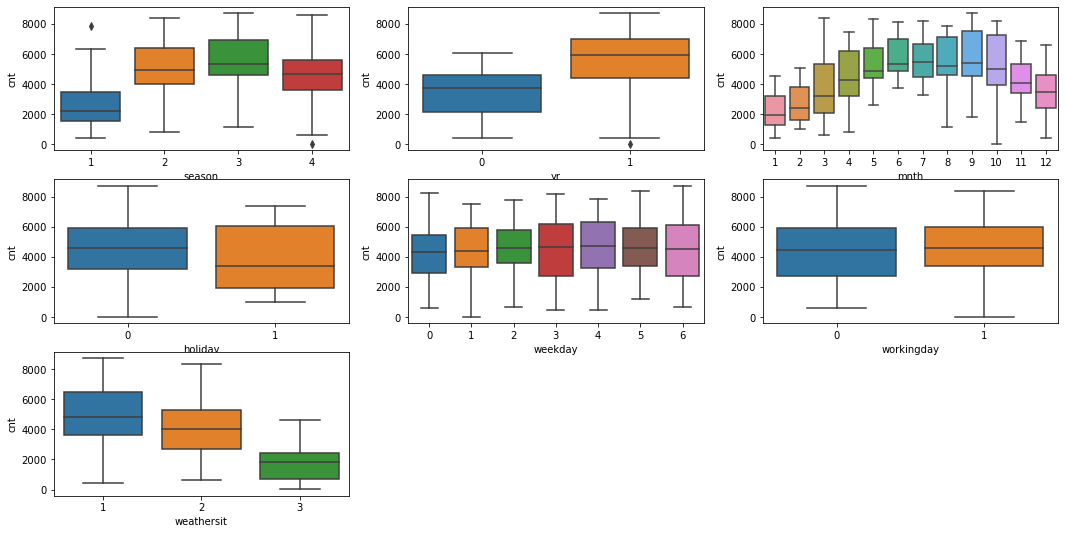

In [260]:
# Checking the relation between 'cnt' with all categorical Variables
plt.figure(figsize=(18,9))

plt.subplot(3,3,1)
sns.boxplot(data=bike,x='season',y='cnt')

plt.subplot(3,3,2)
sns.boxplot(data=bike,x='yr',y='cnt')

plt.subplot(3,3,3)
sns.boxplot(data=bike,x='mnth',y='cnt')

plt.subplot(3,3,4)
sns.boxplot(data=bike,x='holiday',y='cnt')

plt.subplot(3,3,5)
sns.boxplot(data=bike,x='weekday',y='cnt')

plt.subplot(3,3,6)
sns.boxplot(data=bike,x='workingday',y='cnt')

plt.subplot(3,3,7)
sns.boxplot(data=bike,x='weathersit',y='cnt')

plt.show()

#### Multiple users have availed the bikes in summerand fall,and in 2019 
#### Around Aug , Sept and Octber there is seen a spike in the usage 
#### in Holiday people seems to have availed the bike very less and in not holiday situation as usual very high number of users are booking the bikes. As seen the median is quite higher than of a median of holiday. 
#### if workingday more number of users are availing the bikes 
#### Weather situation has a good trend for prediction as well. weathersit 1 and 2 is where most of the users has availed bikes

##  Preparing the data for modelling
* Encoding
    * Converting Binary variables to 1/0
    * Converting other categorical variables to dummy variables using one hot encoder


In [261]:
# Creating object for OneHotEncoder class
ohe = OneHotEncoder(sparse=False,drop='first')

In [262]:
transform = pd.DataFrame(ohe.fit_transform(bike[['season','mnth','weekday','weathersit']]),columns=ohe.get_feature_names())

In [263]:
transform

,x0_2,x0_3,x0_4,x1_2,x1_3,x1_4,x1_5,x1_6,x1_7,x1_8,...,x1_11,x1_12,x2_1,x2_2,x2_3,x2_4,x2_5,x2_6,x3_2,x3_3
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
726,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
727,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
728,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Created dummy variables using below information 
 - x0 for season, x1 for month, x2 for day of week and x3 is for weather situation

* season : season (1:spring, 2:summer, 3:fall, 4:winter)
* mnth : month ( 1 to 12)
* weekday : day of the week (1 to 6)
* weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	-temp : temperature in Celsius

In [264]:
# Merging newly created dummy variables with actual dataframe
bike = pd.concat([bike,transform],axis=1)

In [265]:
# Dropping original columns of the dummy variables 

bike = bike.drop(['season','mnth','weekday','weathersit'],axis=1)

In [266]:
# 'atemp' is highly correlated with 'temp' hence dropping

bike = bike.drop('atemp',axis=1)

In [267]:
# 'instant','dteday','casual','registered' are not necessary columns hence dropping them 

bike = bike.drop(['instant','dteday','casual','registered'],axis=1)

In [268]:
bike.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'x0_2', 'x0_3', 'x0_4', 'x1_2', 'x1_3', 'x1_4', 'x1_5', 'x1_6', 'x1_7',
       'x1_8', 'x1_9', 'x1_10', 'x1_11', 'x1_12', 'x2_1', 'x2_2', 'x2_3',
       'x2_4', 'x2_5', 'x2_6', 'x3_2', 'x3_3'],
      dtype='object')

### Splitting into Train and Test data set

In [269]:
df_train, df_test = train_test_split(bike,train_size=0.7,random_state=100)


In [270]:
print(df_train.shape)
print(df_test.shape)

(510, 29)
(220, 29)


### Scaling continuous variables using Standardisation

In [271]:
# initializing and creating object of StandardScaler
scaler = StandardScaler()

In [272]:
#fitting scaler in all the continuous required columns 
df_train[['cnt','temp','hum','windspeed']] = scaler.fit_transform(df_train[['cnt','temp','hum','windspeed']])

In [273]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,x0_2,x0_3,x0_4,...,x1_11,x1_12,x2_1,x2_2,x2_3,x2_4,x2_5,x2_6,x3_2,x3_3
576,1,0,1,1.230870,0.515796,-0.331282,1.401236,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
426,1,0,0,-0.421238,-0.070634,-0.386359,-0.215182,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
728,1,0,0,-1.295618,-1.046051,2.017388,-1.380030,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
482,1,0,0,-0.628327,-1.001847,-0.780539,-0.136157,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
111,0,0,1,-0.849222,0.695551,0.354275,-1.438016,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [274]:
df_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'x0_2', 'x0_3', 'x0_4', 'x1_2', 'x1_3', 'x1_4', 'x1_5', 'x1_6', 'x1_7',
       'x1_8', 'x1_9', 'x1_10', 'x1_11', 'x1_12', 'x2_1', 'x2_2', 'x2_3',
       'x2_4', 'x2_5', 'x2_6', 'x3_2', 'x3_3'],
      dtype='object')

### Creating X (indipendent variables) and y (target variables ) from df_train 

In [275]:
#X_train, y_train

df_train_y = df_train.pop('cnt')

In [276]:
df_train_X = df_train

In [277]:
df_train_y.shape

(510,)

In [278]:
df_train_X.shape

(510, 28)

In [279]:
df_train_X.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'x0_2',
       'x0_3', 'x0_4', 'x1_2', 'x1_3', 'x1_4', 'x1_5', 'x1_6', 'x1_7', 'x1_8',
       'x1_9', 'x1_10', 'x1_11', 'x1_12', 'x2_1', 'x2_2', 'x2_3', 'x2_4',
       'x2_5', 'x2_6', 'x3_2', 'x3_3'],
      dtype='object')

### Checking correlation between each other

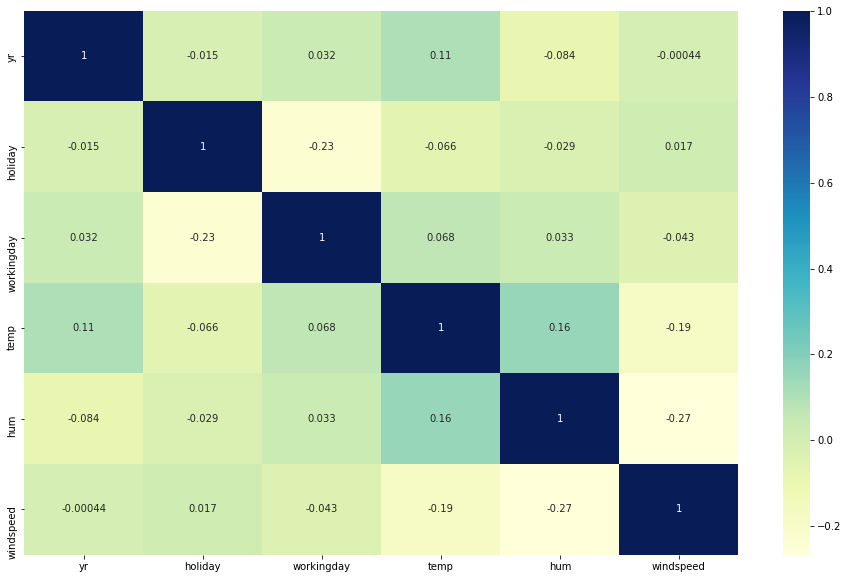

In [280]:
# heatmap
plt.figure(figsize=[16,10])
sns.heatmap(df_train_X[[ 'yr', 'holiday', 'workingday', 'temp', 'hum',
       'windspeed']].corr(),annot=True,cmap ='YlGnBu')

plt.show()

#### Wroking day, humidity, yr are correlated 

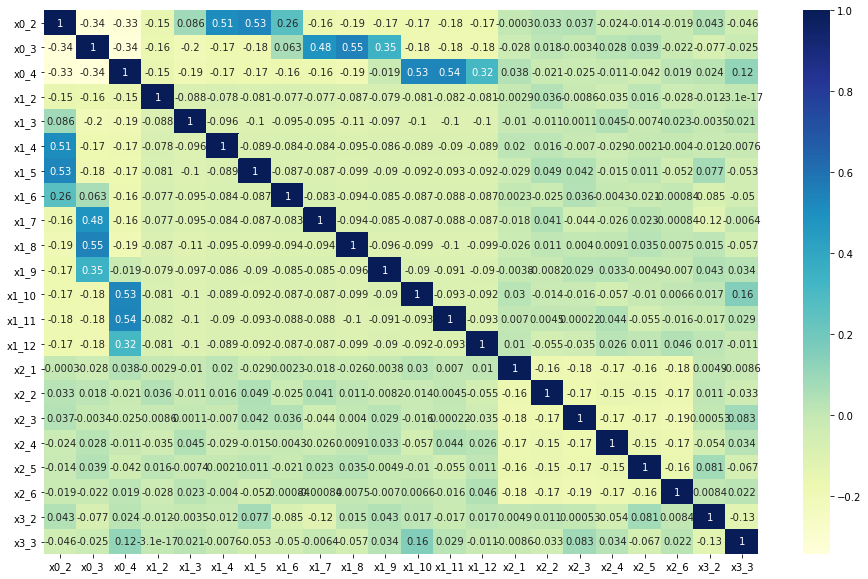

In [281]:
# heatmap
plt.figure(figsize=[16,10])
sns.heatmap(df_train_X[['x0_2',
       'x0_3', 'x0_4', 'x1_2', 'x1_3', 'x1_4', 'x1_5', 'x1_6', 'x1_7', 'x1_8',
       'x1_9', 'x1_10', 'x1_11', 'x1_12', 'x2_1', 'x2_2', 'x2_3', 'x2_4',
       'x2_5', 'x2_6', 'x3_2', 'x3_3']].corr(),annot=True,cmap ='YlGnBu')

plt.show()

#### x0_3 and x0_8,x0_9 , x0_4 and x0_10,x0_11,x0_12 are highly correlated between each other. x0_2,x0_3,x0_4 are related to X1_4, X1_5, X1_6, X1_7, X1_8.
#### Need to decide which variables to drop to create a good fit Model

## Using RFE Method  

#### to decide a best fit Model and choosing 13 as the best fit number of  indipendent varibles

* completed the backward method and dropped varibles with high p-value and checked VIF one by one.
* After doing this end up with 13 variables where no high p-value as well as VIF was less than 5.
* Hence choosing the number 13 for RFE Model

In [282]:
df_train_X.head()

,yr,holiday,workingday,temp,hum,windspeed,x0_2,x0_3,x0_4,x1_2,...,x1_11,x1_12,x2_1,x2_2,x2_3,x2_4,x2_5,x2_6,x3_2,x3_3
576,1,0,1,1.230870,0.515796,-0.331282,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
426,1,0,0,-0.421238,-0.070634,-0.386359,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
728,1,0,0,-1.295618,-1.046051,2.017388,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
482,1,0,0,-0.628327,-1.001847,-0.780539,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
111,0,0,1,-0.849222,0.695551,0.354275,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [283]:
df_train_X.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'x0_2',
       'x0_3', 'x0_4', 'x1_2', 'x1_3', 'x1_4', 'x1_5', 'x1_6', 'x1_7', 'x1_8',
       'x1_9', 'x1_10', 'x1_11', 'x1_12', 'x2_1', 'x2_2', 'x2_3', 'x2_4',
       'x2_5', 'x2_6', 'x3_2', 'x3_3'],
      dtype='object')

In [284]:
print(df_train.shape)
print(df_test.shape)

(510, 28)
(220, 29)


In [285]:
print(df_train_X.shape)
print(df_test_y.shape)

(510, 28)
(220,)


In [286]:
#creating object of linear regression
lm = LinearRegression()

In [287]:
# letting the model learn coefficients by fit() method
lm.fit(df_train_X,df_train_y)

LinearRegression()

In [288]:
rfe = RFE(lm,13)

In [289]:
rfe = rfe.fit(df_train_X,df_train_y)

In [290]:
list(zip(df_train_X.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', False, 12),
 ('windspeed', False, 11),
 ('x0_2', True, 1),
 ('x0_3', False, 3),
 ('x0_4', True, 1),
 ('x1_2', False, 14),
 ('x1_3', False, 9),
 ('x1_4', False, 10),
 ('x1_5', False, 7),
 ('x1_6', False, 8),
 ('x1_7', False, 13),
 ('x1_8', False, 5),
 ('x1_9', True, 1),
 ('x1_10', False, 6),
 ('x1_11', False, 16),
 ('x1_12', False, 15),
 ('x2_1', True, 1),
 ('x2_2', True, 1),
 ('x2_3', True, 1),
 ('x2_4', True, 1),
 ('x2_5', True, 1),
 ('x2_6', False, 4),
 ('x3_2', False, 2),
 ('x3_3', True, 1)]

#### taking the columns advised by RFE (rfe.support_ = true) and creating the first model with 13 variables

In [291]:
col = df_train_X.columns[rfe.support_]

In [292]:
col

Index(['yr', 'holiday', 'workingday', 'temp', 'x0_2', 'x0_4', 'x1_9', 'x2_1',
       'x2_2', 'x2_3', 'x2_4', 'x2_5', 'x3_3'],
      dtype='object')

In [293]:
df_train_X_rfe = df_train_X[col]

In [294]:
# adding constant 
df_train_X_rfe_sm = sm.add_constant(df_train_X_rfe)

In [295]:
#creating object 
lm = sm.OLS(df_train_y,df_train_X_rfe_sm)

In [296]:
# fitting or learning the model 
lm_rfeModel = lm.fit()

In [297]:
lm_rfeModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     160.2
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          4.27e-162
Time:                        20:19:56   Log-Likelihood:                -320.10
No. Observations:                 510   AIC:                             666.2
Df Residuals:                     497   BIC:                             721.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7956      0.048    -16.575      0.000      -0.890      -0.701
yr             1.0366      0.041     25.242      0.000       0.956       1.117
holiday       -0.2880      0.117     -2.461      0.014      -0.518      -0.058
workingday     0.1061      0.039      2.705      0.007       0.029       0.183
temp           0.5941      0.022     27.403      0.000       0.551       0.637
x0_2           0.3400      0.051      6.648      0.000       0.240       0.441
x0_4           0.5999      0.051     11.671      0.000       0.499       0.701
x1_9           0.4218      0.078      5.385      0.000       0.268       0.576
x2_1          -0.0849      0.049     -1.729      0.084      -0.181       0.012
x2_2          -0.0766      0.056     -1.357      0.175      -0.187       0.034
x2_3          -0.0133      0.053     -0.251      0.802      -0.117       0.091
x2_4          -0.0021      0.055     -0.038      0.970      -0.110       0.105
x2_5          -0.0051      0.056     -0.090      0.928      -0.116       0.106
x3_3          -1.2065      0.122     -9.870      0.000      -1.447      -0.966
==============================================================================
Omnibus:                       61.521   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              106.475
Skew:                          -0.747   Prob(JB):                     7.57e-24
Kurtosis:                       4.666   Cond. No.                     1.32e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.09e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### x2_1 having high p-value hence dropping and again creating the model

In [298]:
df_train_X_rfe = df_train_X_rfe.drop('x2_1',axis=1)

In [299]:
df_train_X_rfe_sm = sm.add_constant(df_train_X_rfe)
lm = sm.OLS(df_train_y,df_train_X_rfe_sm)
lm_rfeModel = lm.fit()
lm_rfeModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     160.2
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          4.27e-162
Time:                        20:20:08   Log-Likelihood:                -320.10
No. Observations:                 510   AIC:                             666.2
Df Residuals:                     497   BIC:                             721.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7956      0.048    -16.575      0.000      -0.890      -0.701
yr             1.0366      0.041     25.242      0.000       0.956       1.117
holiday       -0.3729      0.134     -2.778      0.006      -0.637      -0.109
workingday     0.0212      0.067      0.317      0.751      -0.110       0.152
temp           0.5941      0.022     27.403      0.000       0.551       0.637
x0_2           0.3400      0.051      6.648      0.000       0.240       0.441
x0_4           0.5999      0.051     11.671      0.000       0.499       0.701
x1_9           0.4218      0.078      5.385      0.000       0.268       0.576
x2_2           0.0083      0.079      0.106      0.916      -0.147       0.163
x2_3           0.0716      0.075      0.950      0.343      -0.077       0.220
x2_4           0.0829      0.078      1.065      0.287      -0.070       0.236
x2_5           0.0798      0.079      1.009      0.314      -0.076       0.235
x3_3          -1.2065      0.122     -9.870      0.000      -1.447      -0.966
==============================================================================
Omnibus:                       61.521   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              106.475
Skew:                          -0.747   Prob(JB):                     7.57e-24
Kurtosis:                       4.666   Cond. No.                         10.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### x2_2 having high p-value hence dropping and again creating the model

In [300]:
df_train_X_rfe = df_train_X_rfe.drop('x2_2',axis=1)
df_train_X_rfe_sm = sm.add_constant(df_train_X_rfe)
lm = sm.OLS(df_train_y,df_train_X_rfe_sm)
lm_rfeModel = lm.fit()
lm_rfeModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     175.1
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          3.17e-163
Time:                        20:21:12   Log-Likelihood:                -320.10
No. Observations:                 510   AIC:                             664.2
Df Residuals:                     498   BIC:                             715.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7954      0.048    -16.595      0.000      -0.890      -0.701
yr             1.0364      0.041     25.289      0.000       0.956       1.117
holiday       -0.3719      0.134     -2.780      0.006      -0.635      -0.109
workingday     0.0253      0.054      0.466      0.642      -0.081       0.132
temp           0.5941      0.022     27.453      0.000       0.552       0.637
x0_2           0.3400      0.051      6.654      0.000       0.240       0.440
x0_4           0.5998      0.051     11.682      0.000       0.499       0.701
x1_9           0.4218      0.078      5.390      0.000       0.268       0.576
x2_3           0.0675      0.065      1.045      0.297      -0.059       0.194
x2_4           0.0788      0.068      1.162      0.246      -0.054       0.212
x2_5           0.0758      0.069      1.097      0.273      -0.060       0.212
x3_3          -1.2068      0.122     -9.885      0.000      -1.447      -0.967
==============================================================================
Omnibus:                       61.513   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              106.506
Skew:                          -0.747   Prob(JB):                     7.46e-24
Kurtosis:                       4.667   Cond. No.                         9.54
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### x2_3 having high p-value hence dropping and again creating the model

In [301]:
df_train_X_rfe = df_train_X_rfe.drop('x2_3',axis=1)
df_train_X_rfe_sm = sm.add_constant(df_train_X_rfe)
lm = sm.OLS(df_train_y,df_train_X_rfe_sm)
lm_rfeModel = lm.fit()
lm_rfeModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     192.5
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          3.83e-164
Time:                        20:21:13   Log-Likelihood:                -320.66
No. Observations:                 510   AIC:                             663.3
Df Residuals:                     499   BIC:                             709.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7951      0.048    -16.587      0.000      -0.889      -0.701
yr             1.0355      0.041     25.270      0.000       0.955       1.116
holiday       -0.3660      0.134     -2.739      0.006      -0.629      -0.103
workingday     0.0503      0.049      1.032      0.302      -0.045       0.146
temp           0.5941      0.022     27.449      0.000       0.552       0.637
x0_2           0.3403      0.051      6.660      0.000       0.240       0.441
x0_4           0.5986      0.051     11.660      0.000       0.498       0.699
x1_9           0.4242      0.078      5.423      0.000       0.271       0.578
x2_4           0.0541      0.064      0.851      0.395      -0.071       0.179
x2_5           0.0512      0.065      0.788      0.431      -0.076       0.179
x3_3          -1.1974      0.122     -9.834      0.000      -1.437      -0.958
==============================================================================
Omnibus:                       62.689   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              111.190
Skew:                          -0.750   Prob(JB):                     7.17e-25
Kurtosis:                       4.727   Cond. No.                         9.41
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### x2_4 having high p-value hence dropping and again creating the model

In [302]:
df_train_X_rfe = df_train_X_rfe.drop('x2_4',axis=1)
df_train_X_rfe_sm = sm.add_constant(df_train_X_rfe)
lm = sm.OLS(df_train_y,df_train_X_rfe_sm)
lm_rfeModel = lm.fit()
lm_rfeModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     213.9
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          3.65e-165
Time:                        20:21:15   Log-Likelihood:                -321.03
No. Observations:                 510   AIC:                             662.1
Df Residuals:                     500   BIC:                             704.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7943      0.048    -16.578      0.000      -0.888      -0.700
yr             1.0349      0.041     25.266      0.000       0.954       1.115
holiday       -0.3571      0.133     -2.680      0.008      -0.619      -0.095
workingday     0.0630      0.046      1.360      0.174      -0.028       0.154
temp           0.5939      0.022     27.448      0.000       0.551       0.636
x0_2           0.3386      0.051      6.634      0.000       0.238       0.439
x0_4           0.5977      0.051     11.647      0.000       0.497       0.698
x1_9           0.4254      0.078      5.440      0.000       0.272       0.579
x2_5           0.0385      0.063      0.609      0.543      -0.086       0.163
x3_3          -1.1960      0.122     -9.826      0.000      -1.435      -0.957
==============================================================================
Omnibus:                       62.907   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              112.843
Skew:                          -0.748   Prob(JB):                     3.14e-25
Kurtosis:                       4.753   Cond. No.                         9.31
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### x2_5 having high p-value hence dropping and again creating the model

In [303]:
df_train_X_rfe = df_train_X_rfe.drop('x2_5',axis=1)
df_train_X_rfe_sm = sm.add_constant(df_train_X_rfe)
lm = sm.OLS(df_train_y,df_train_X_rfe_sm)
lm_rfeModel = lm.fit()
lm_rfeModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     240.9
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          2.74e-166
Time:                        20:21:16   Log-Likelihood:                -321.22
No. Observations:                 510   AIC:                             660.4
Df Residuals:                     501   BIC:                             698.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7933      0.048    -16.577      0.000      -0.887      -0.699
yr             1.0343      0.041     25.275      0.000       0.954       1.115
holiday       -0.3543      0.133     -2.663      0.008      -0.616      -0.093
workingday     0.0702      0.045      1.568      0.117      -0.018       0.158
temp           0.5939      0.022     27.466      0.000       0.551       0.636
x0_2           0.3374      0.051      6.619      0.000       0.237       0.438
x0_4           0.5966      0.051     11.641      0.000       0.496       0.697
x1_9           0.4246      0.078      5.434      0.000       0.271       0.578
x3_3          -1.2013      0.121     -9.901      0.000      -1.440      -0.963
==============================================================================
Omnibus:                       62.289   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              112.166
Skew:                          -0.740   Prob(JB):                     4.40e-25
Kurtosis:                       4.757   Cond. No.                         9.26
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [304]:
#Create a dataframe that will contain the names of all the feature variables and their respective VIF
vif = pd.DataFrame()
vif['Features'] = df_train_X_rfe.columns
vif['VIF'] = [variance_inflation_factor(df_train_X_rfe.values,i) for i in range(df_train_X_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by= 'VIF',ascending=False)
vif


,Features,VIF
2,workingday,1.96
0,yr,1.69
5,x0_4,1.37
4,x0_2,1.36
6,x1_9,1.15
3,temp,1.13
7,x3_3,1.05
1,holiday,1.04


### Found all p-values less towars almost 0(less than 5%) , and the VIF is also less than 5

In [305]:
#orediction on the train set
df_train_y_pred = lm_rfeModel.predict(df_train_X_rfe_sm)

In [306]:
X_final = df_train_X_rfe.columns

In [307]:
lm_rfeModel.params

const        -0.793273
yr            1.034289
holiday      -0.354258
workingday    0.070190
temp          0.593875
x0_2          0.337414
x0_4          0.596648
x1_9          0.424555
x3_3         -1.201348
dtype: float64

### We can See the equation for best fitted Line is :

 - Cnt = 0.793 * yr - 0.354 * holiday + 0.070 * workingday + 0.593 * temp + 0.337 * x0_2 + 0.596 * x0_4 + 0.424 * x1_9 -1.201 * x3_3
 
 x0 --> Season ,
 x1 --> Month ,
 x2 --> DayoftheWeek ,
 x3 --> Weather Situaion.

## Residual analysis

In [308]:
res = df_train_y - df_train_y_pred

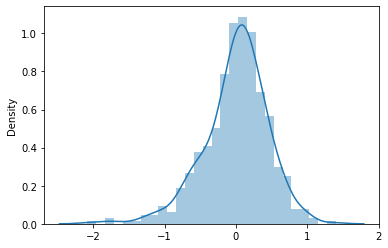

In [309]:
# Normality of Error
sns.distplot(res)
plt.show()

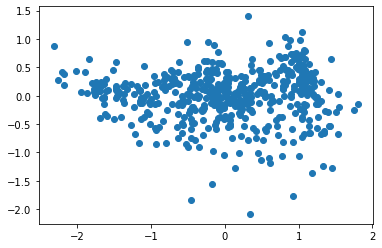

In [332]:
#Homoscedasticity:

plt.scatter(df_train_y_pred,res)
plt.show()

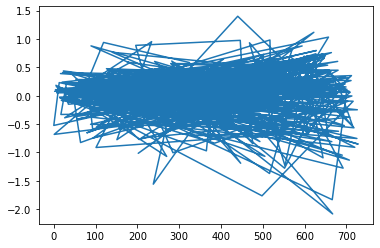

In [333]:
plt.plot(res)

## Applying on test set 

In [311]:
df_test[['cnt','temp','hum','windspeed']] = scaler.transform(df_test[['cnt','temp','hum','windspeed']])

In [312]:
df_test_y = df_test.pop('cnt')

In [313]:
df_test_X = df_test

In [314]:
df_test_X_sm = sm.add_constant(df_test_X[X_final])

In [315]:
df_test_X_sm.shape

(220, 9)

In [316]:
df_test_y_pred = lm_rfeModel.predict(df_test_X_sm)

In [318]:
print('R2 Score for Train data set is : ',(round(r2_score(df_train_y,df_train_y_pred),3)))
print('R2 Score for Test data set is :  ',(round(r2_score(df_test_y,df_test_y_pred),3)))

R2 Score for Train data set is :  0.794
R2 Score for Test data set is :   0.777


In [319]:
print('MSE : ',round(mean_squared_error(df_train_y,df_train_y_pred),4))

MSE :  0.2063


In [320]:
print('RMSE : ',round(np.sqrt(mean_squared_error(df_train_y,df_train_y_pred)),4))

RMSE :  0.4543


In [321]:
n = df_test_X[X_final].shape[0]


In [322]:
p = df_test_X[X_final].shape[1]


In [323]:
print(n,p)

220 8


In [324]:
r2_test = r2_score(df_test_y,df_test_y_pred)

In [325]:
(r2_test)

0.7765145582708768

In [326]:
adjst_r2 = 1-(1-r2_test)*(n-1)/(n-p-1)

In [327]:
round(adjst_r2,3)

0.768

### Created a linear model that describes the effect of various features on demand.

##### below variables are significant in predicting the demand for shared bikes

- yr
- holiday
- workingday
- temp
- x0_2 (summer)
- x0_4 (Winter)
- x1_9 (September)
- x3_3 (weathersit:Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds)
 

### R2 Score compare:

- R2 Score for Train data set is :  0.794
- R2 Score for Test data set is :   0.777